In [2]:
import numpy as np
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame
from shapely.geometry import Point
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

ERROR 1: PROJ: proj_create_from_database: Open of /opt/conda/share/proj failed


In [3]:
# クラスタ番号がついた駅データを読み込む
stations = pd.read_csv('./stations_with_hierarchical_cluster_4_without_pca.csv')

In [4]:
# GeoDataFrameに変換する
stations_gdf = GeoDataFrame(
    stations,
    crs='epsg:4326',
    geometry=[Point(xy) for xy in zip(stations.lon, stations.lat)])


In [5]:
stations_gdf.head()

station_cd  station_g_cd station_name  station_name_k  station_name_r  \
0     1130506       1130506          東所沢             NaN             NaN   
1     1130507       1130507           新座             NaN             NaN   
2     1130508       1130508          北朝霞             NaN             NaN   
3     1130509       1130509          西浦和             NaN             NaN   
4     1130510       1130510         武蔵浦和             NaN             NaN   

   line_cd  pref_cd      post           address         lon  ...  \
0    11305       11  359-0022          所沢市本郷１丁目  139.513878  ...   
1    11305       11  352-0011         新座市野火止５丁目  139.556328  ...   
2    11305       11  351-0033          朝霞市浜崎１丁目  139.587322  ...   
3    11305       11  338-0837      さいたま市桜区田島５丁目  139.627707  ...   
4    11305       11  336-0021  さいたま市南区別所七丁目12-1  139.647974  ...   

   intersection_density_km edge_density_km street_density_km  circuity_avg  \
0               200.261250    44092.478846      22317.256266      1.033771   
1               176.365231    36061.846385      18873.557190      1.096247   
2               220.936925    43252.257861      22209.618128      1.058486   
3               220.477262    41545.071412      21726.569992      1.042005   
4               246.320245    45257.298857      23983.223340      1.010927   

   self_loop_proportion  clean_intersection_count  \
0              0.002147                     366.0   
1              0.003834                     277.0   
2              0.001174                     335.0   
3              0.000000                     301.0   
4              0.000000                     418.0   

   clean_intersection_density_km  station_name_roman  cluster_number  \
0                     165.080220                 NaN               3   
1                     115.765803                 NaN               3   
2                     134.570673                 NaN               1   
3                     125.451145                 NaN               1   
4                     166.874979                 NaN               1   

                     geometry  
0  POINT (139.51388 35.79461)  
1  POINT (139.55633 35.80381)  
2  POINT (139.58732 35.81547)  
3  POINT (139.62771 35.84414)  
4  POINT (139.64797 35.84605)  

[5 rows x 38 columns]

In [6]:
upa = gpd.read_file('../data/upa_kanto.geojson')

In [7]:
upa[upa['prefec_cd'] == 13].head(-10)

prefec_cd  area_cd  layer_no  \
1391         13    13101         1   
1392         13    13102         1   
1393         13    13102         1   
1394         13    13102         1   
1395         13    13102         1   
...         ...      ...       ...   
1549         13    13303         2   
1550         13    13303         2   
1551         13    13305         1   
1552         13    13305         2   
1553         13    13305         2   

                                               geometry  
1391  POLYGON ((139.73001 35.68538, 139.73000 35.685...  
1392  POLYGON ((139.75432 35.66990, 139.75446 35.669...  
1393  POLYGON ((139.76741 35.65341, 139.76724 35.655...  
1394  POLYGON ((139.76949 35.64927, 139.76976 35.649...  
1395  POLYGON ((139.77229 35.65902, 139.77229 35.659...  
...                                                 ...  
1549  POLYGON ((139.33839 35.78154, 139.33832 35.781...  
1550  POLYGON ((139.35719 35.78288, 139.35718 35.782...  
1551  POLYGON ((139.22700 35.74569, 139.22653 35.746...  
1552  POLYGON ((139.16304 35.77824, 139.16308 35.778...  
1553  POLYGON ((139.25572 35.74206, 139.25582 35.742...  

[163 rows x 4 columns]

In [8]:
upa.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [9]:
land_use = gpd.read_file('../data/land_use_kanto.geojson')

In [10]:
land_use.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [11]:
stations_gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [82]:
kanto_lines = gpd.read_file('../data/kanto_lines.geojson')

In [83]:
kanto_lines

name                                    uri   color  \
0         京成電鉄        https://uedayou.net/jrslod/京成電鉄    None   
1    千葉都市モノレール   https://uedayou.net/jrslod/千葉都市モノレール    None   
2       銚子電気鉄道      https://uedayou.net/jrslod/銚子電気鉄道    None   
3        東京地下鉄       https://uedayou.net/jrslod/東京地下鉄    None   
4       東京都交通局      https://uedayou.net/jrslod/東京都交通局    None   
5         北総鉄道        https://uedayou.net/jrslod/北総鉄道    None   
6       東葉高速鉄道      https://uedayou.net/jrslod/東葉高速鉄道    None   
7        新京成電鉄       https://uedayou.net/jrslod/新京成電鉄    None   
8         東武鉄道        https://uedayou.net/jrslod/東武鉄道    None   
9         小湊鐵道        https://uedayou.net/jrslod/小湊鐵道    None   
10          流鉄          https://uedayou.net/jrslod/流鉄    None   
11    首都圏新都市鉄道    https://uedayou.net/jrslod/首都圏新都市鉄道    None   
12        芝山鉄道        https://uedayou.net/jrslod/芝山鉄道  3CB371   
13          山万          https://uedayou.net/jrslod/山万    None   
14   舞浜リゾートライン   https://uedayou.net/jrslod/舞浜リゾートライン    None   
15       いすみ鉄道       https://uedayou.net/jrslod/いすみ鉄道    None   
16      京浜急行電鉄      https://uedayou.net/jrslod/京浜急行電鉄    None   
17       小田急電鉄       https://uedayou.net/jrslod/小田急電鉄    None   
18        東急電鉄        https://uedayou.net/jrslod/東急電鉄    None   
19  横浜シーサイドライン  https://uedayou.net/jrslod/横浜シーサイドライン    None   
20      横浜市交通局      https://uedayou.net/jrslod/横浜市交通局    None   
21      横浜高速鉄道      https://uedayou.net/jrslod/横浜高速鉄道    None   
22       江ノ島電鉄       https://uedayou.net/jrslod/江ノ島電鉄    None   
23     湘南モノレール     https://uedayou.net/jrslod/湘南モノレール    None   
24        相模鉄道        https://uedayou.net/jrslod/相模鉄道    None   
25        京王電鉄        https://uedayou.net/jrslod/京王電鉄    None   
26     東京モノレール     https://uedayou.net/jrslod/東京モノレール    None   
27    東京臨海高速鉄道    https://uedayou.net/jrslod/東京臨海高速鉄道    None   
28      高尾登山電鉄      https://uedayou.net/jrslod/高尾登山電鉄    None   
29      箱根登山鉄道      https://uedayou.net/jrslod/箱根登山鉄道    None   
30      伊豆箱根鉄道      https://uedayou.net/jrslod/伊豆箱根鉄道    None   
31      大山観光電鉄      https://uedayou.net/jrslod/大山観光電鉄    None   
32     埼玉新都市交通     https://uedayou.net/jrslod/埼玉新都市交通    None   
33      埼玉高速鉄道      https://uedayou.net/jrslod/埼玉高速鉄道    None   
34        西武鉄道        https://uedayou.net/jrslod/西武鉄道    None   
35        秩父鉄道        https://uedayou.net/jrslod/秩父鉄道    None   
36   多摩都市モノレール   https://uedayou.net/jrslod/多摩都市モノレール    None   
37      御岳登山鉄道      https://uedayou.net/jrslod/御岳登山鉄道    None   

                                             geometry  
0   MULTILINESTRING ((139.82093 35.71916, 139.8277...  
1   MULTILINESTRING ((140.12225 35.60357, 140.1220...  
2   MULTILINESTRING ((140.82883 35.72915, 140.8261...  
3   MULTILINESTRING ((139.76464 35.67155, 139.7633...  
4   MULTILINESTRING ((139.78263 35.68662, 139.7847...  
5   MULTILINESTRING ((140.20304 35.78772, 140.2024...  
6   MULTILINESTRING ((139.95979 35.70671, 139.9578...  
7   MULTILINESTRING ((140.02411 35.68379, 140.0230...  
8   MULTILINESTRING ((139.75758 35.97813, 139.7555...  
9   MULTILINESTRING ((140.11456 35.42404, 140.1140...  
10  MULTILINESTRING ((139.92012 35.82741, 139.9200...  
11  MULTILINESTRING ((139.95734 35.91027, 139.9576...  
12  MULTILINESTRING ((140.38774 35.76902, 140.3989...  
13  MULTILINESTRING ((140.15541 35.73788, 140.1537...  
14  MULTILINESTRING ((139.88909 35.62755, 139.8898...  
15  MULTILINESTRING ((140.37839 35.26051, 140.3775...  
16  MULTILINESTRING ((139.70233 35.23214, 139.6863...  
17  MULTILINESTRING ((139.43876 35.52066, 139.4358...  
18  MULTILINESTRING ((139.48677 35.55761, 139.4865...  
19  MULTILINESTRING ((139.65012 35.34425, 139.6501...  
20  MULTILINESTRING ((139.62440 35.43728, 139.6258...  
21  MULTILINESTRING ((139.64175 35.44735, 139.6437...  
22  MULTILINESTRING ((139.51024 35.30637, 139.5097...  
23  MULTILINESTRING ((139.50405 35.31926, 139.5046...  
24  MULTILINESTRING ((139.48707 35.41438, 139.4873...  
25  MULTILINESTRIN

<AxesSubplot:>

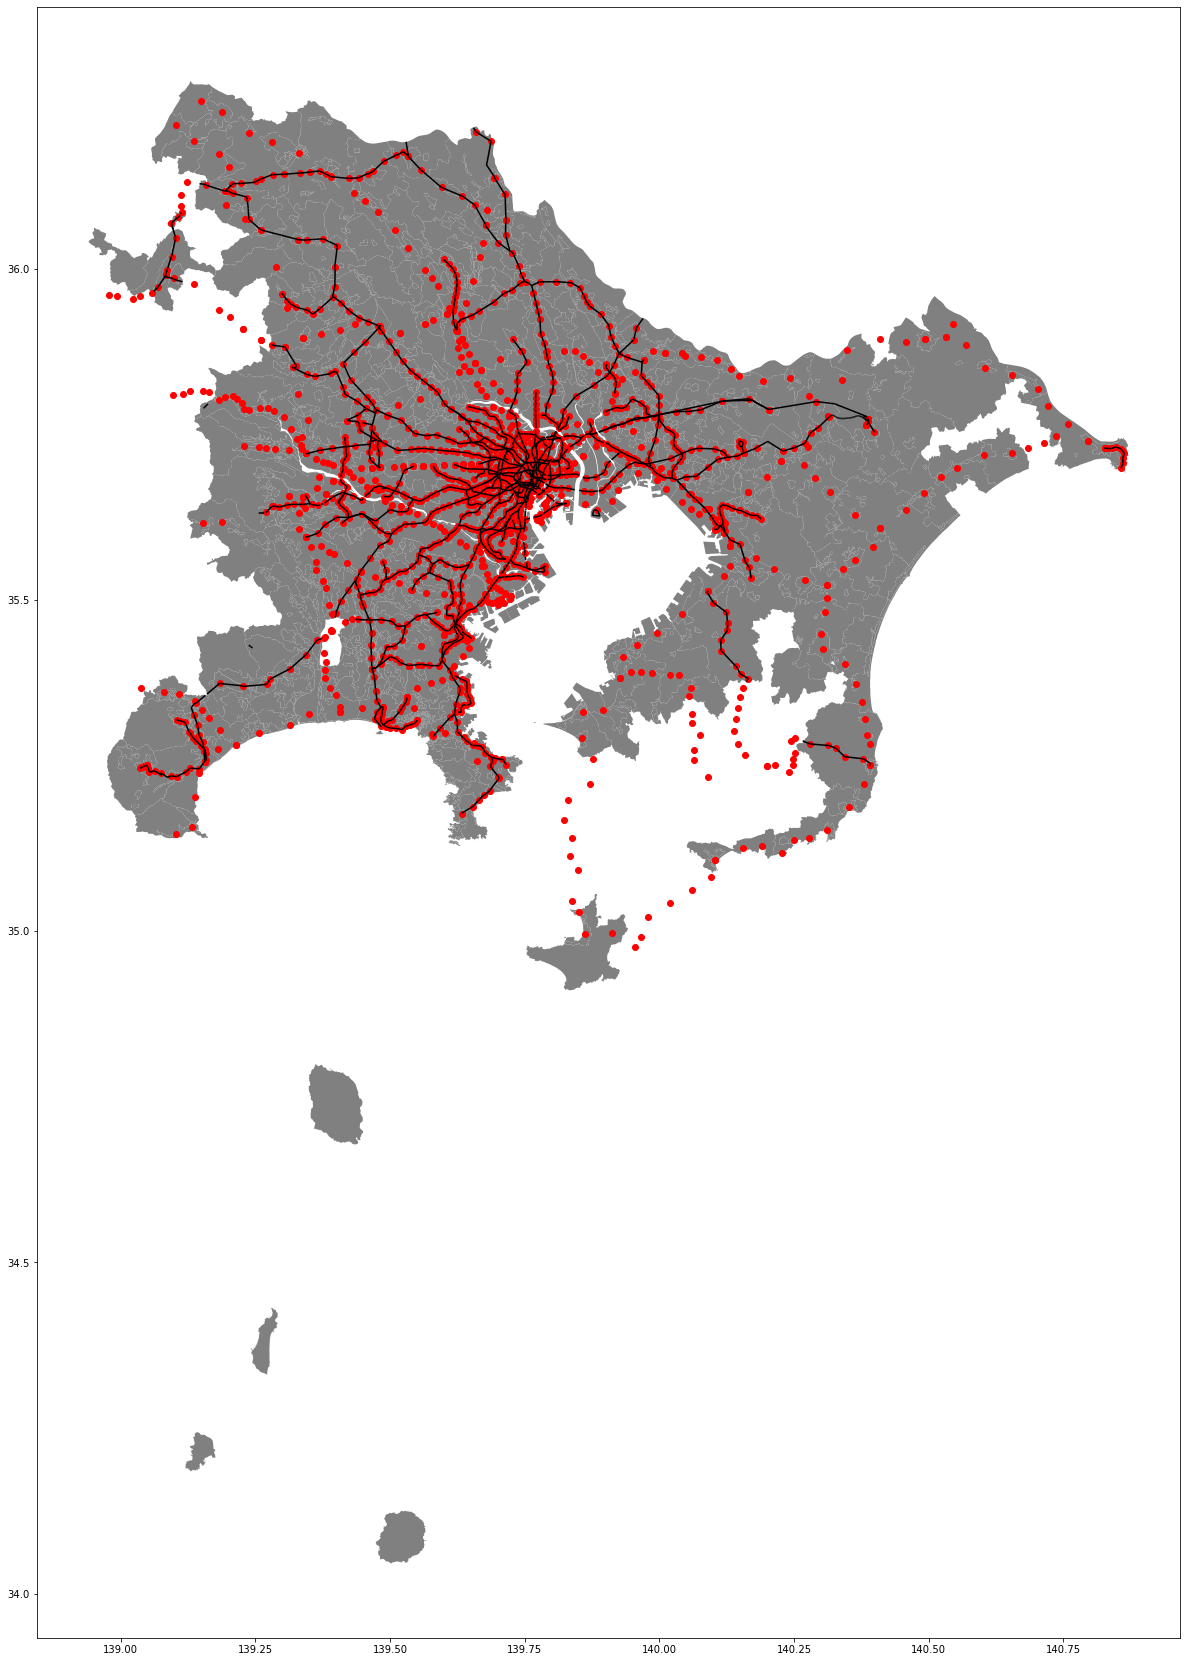

In [84]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
upa[(upa['prefec_cd'] != 13) | (upa['area_cd'] < 13400)].plot(ax = ax, color='gray')
kanto_lines.plot(ax = ax, color='black')
stations_gdf.plot(ax = ax, color='red')


<AxesSubplot:>

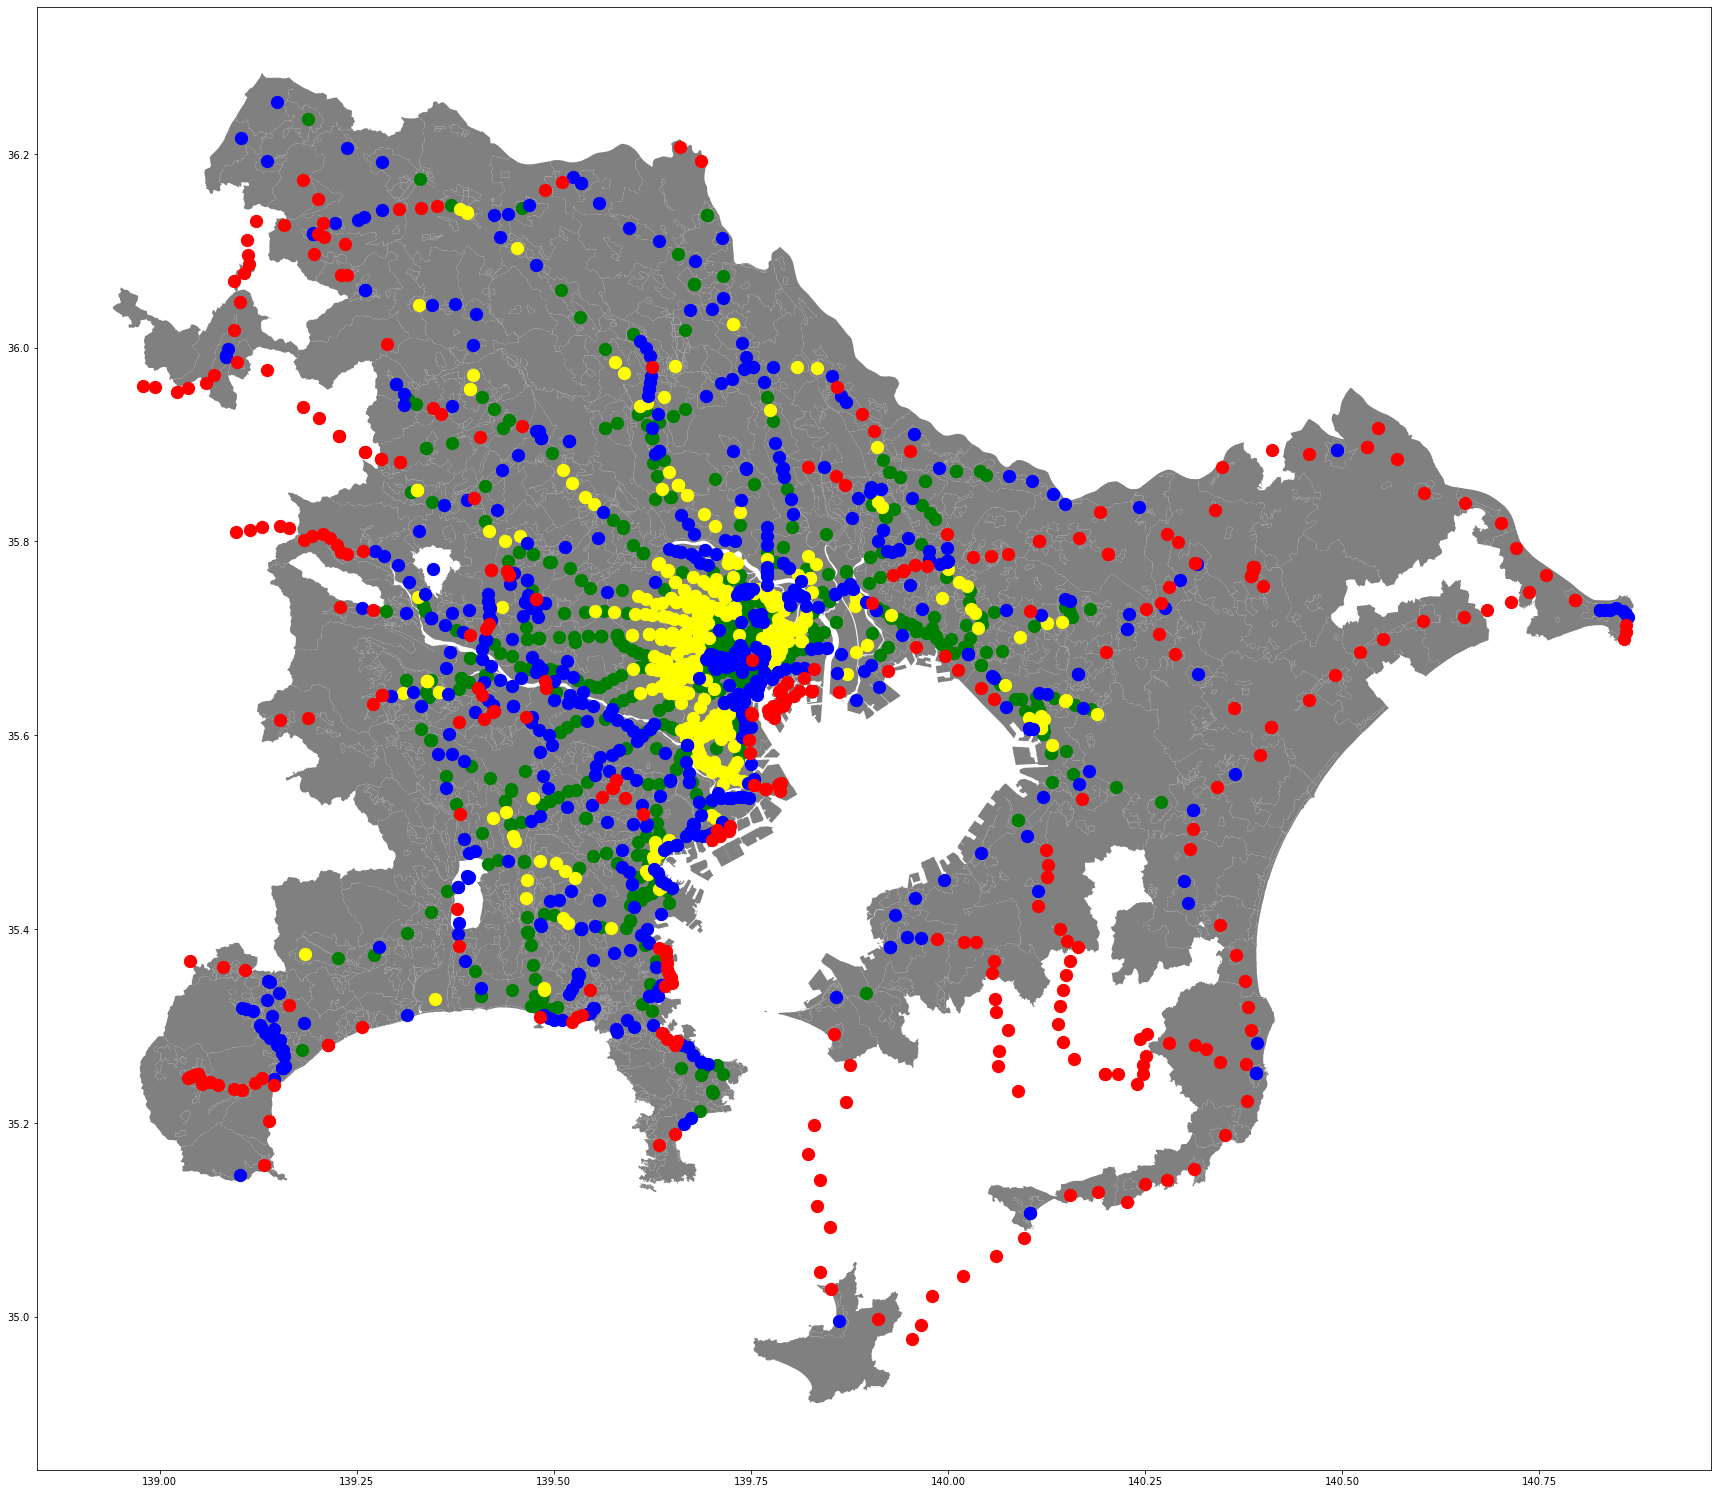

In [85]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
upa[(upa['prefec_cd'] != 13) | (upa['area_cd'] < 13300)].plot(ax = ax, color='gray')
kanto_lines].plot(ax = ax, color='black')
stations_gdf[stations_gdf['cluster_number'] == 1].plot(ax = ax, color='green', markersize=150)
stations_gdf[stations_gdf['cluster_number'] == 2].plot(ax = ax, color='yellow', markersize=150)
stations_gdf[stations_gdf['cluster_number'] == 3].plot(ax = ax, color='blue', markersize=150)
stations_gdf[stations_gdf['cluster_number'] == 4].plot(ax = ax, color='red', markersize=150)


<AxesSubplot:>

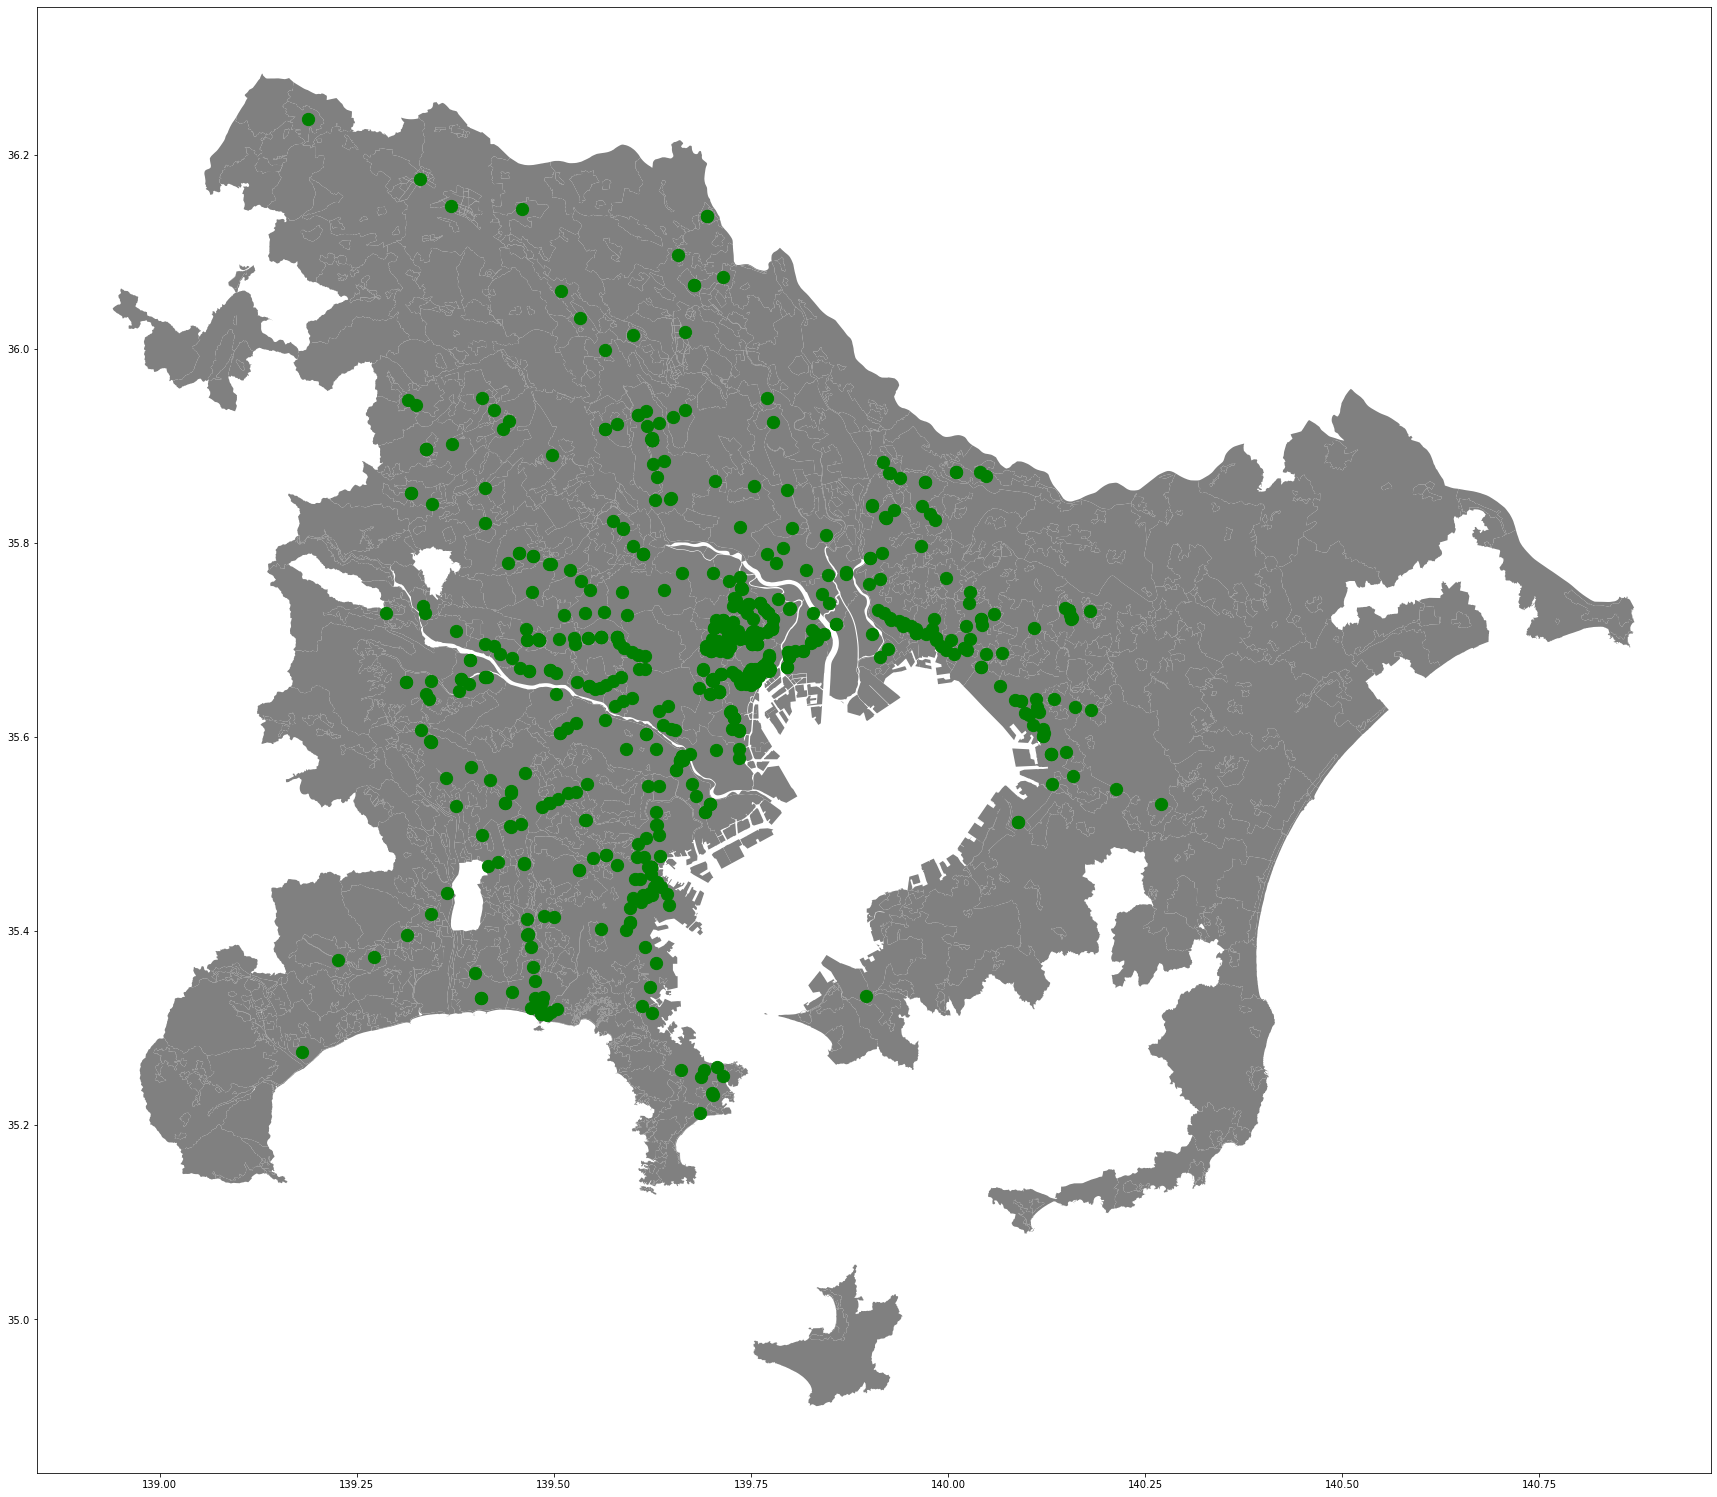

In [34]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
upa[(upa['prefec_cd'] != 13) | (upa['area_cd'] < 13300)].plot(ax = ax, color='gray')
stations_gdf[stations_gdf['cluster_number'] == 1].plot(ax = ax, color='green', markersize=150)

<AxesSubplot:>

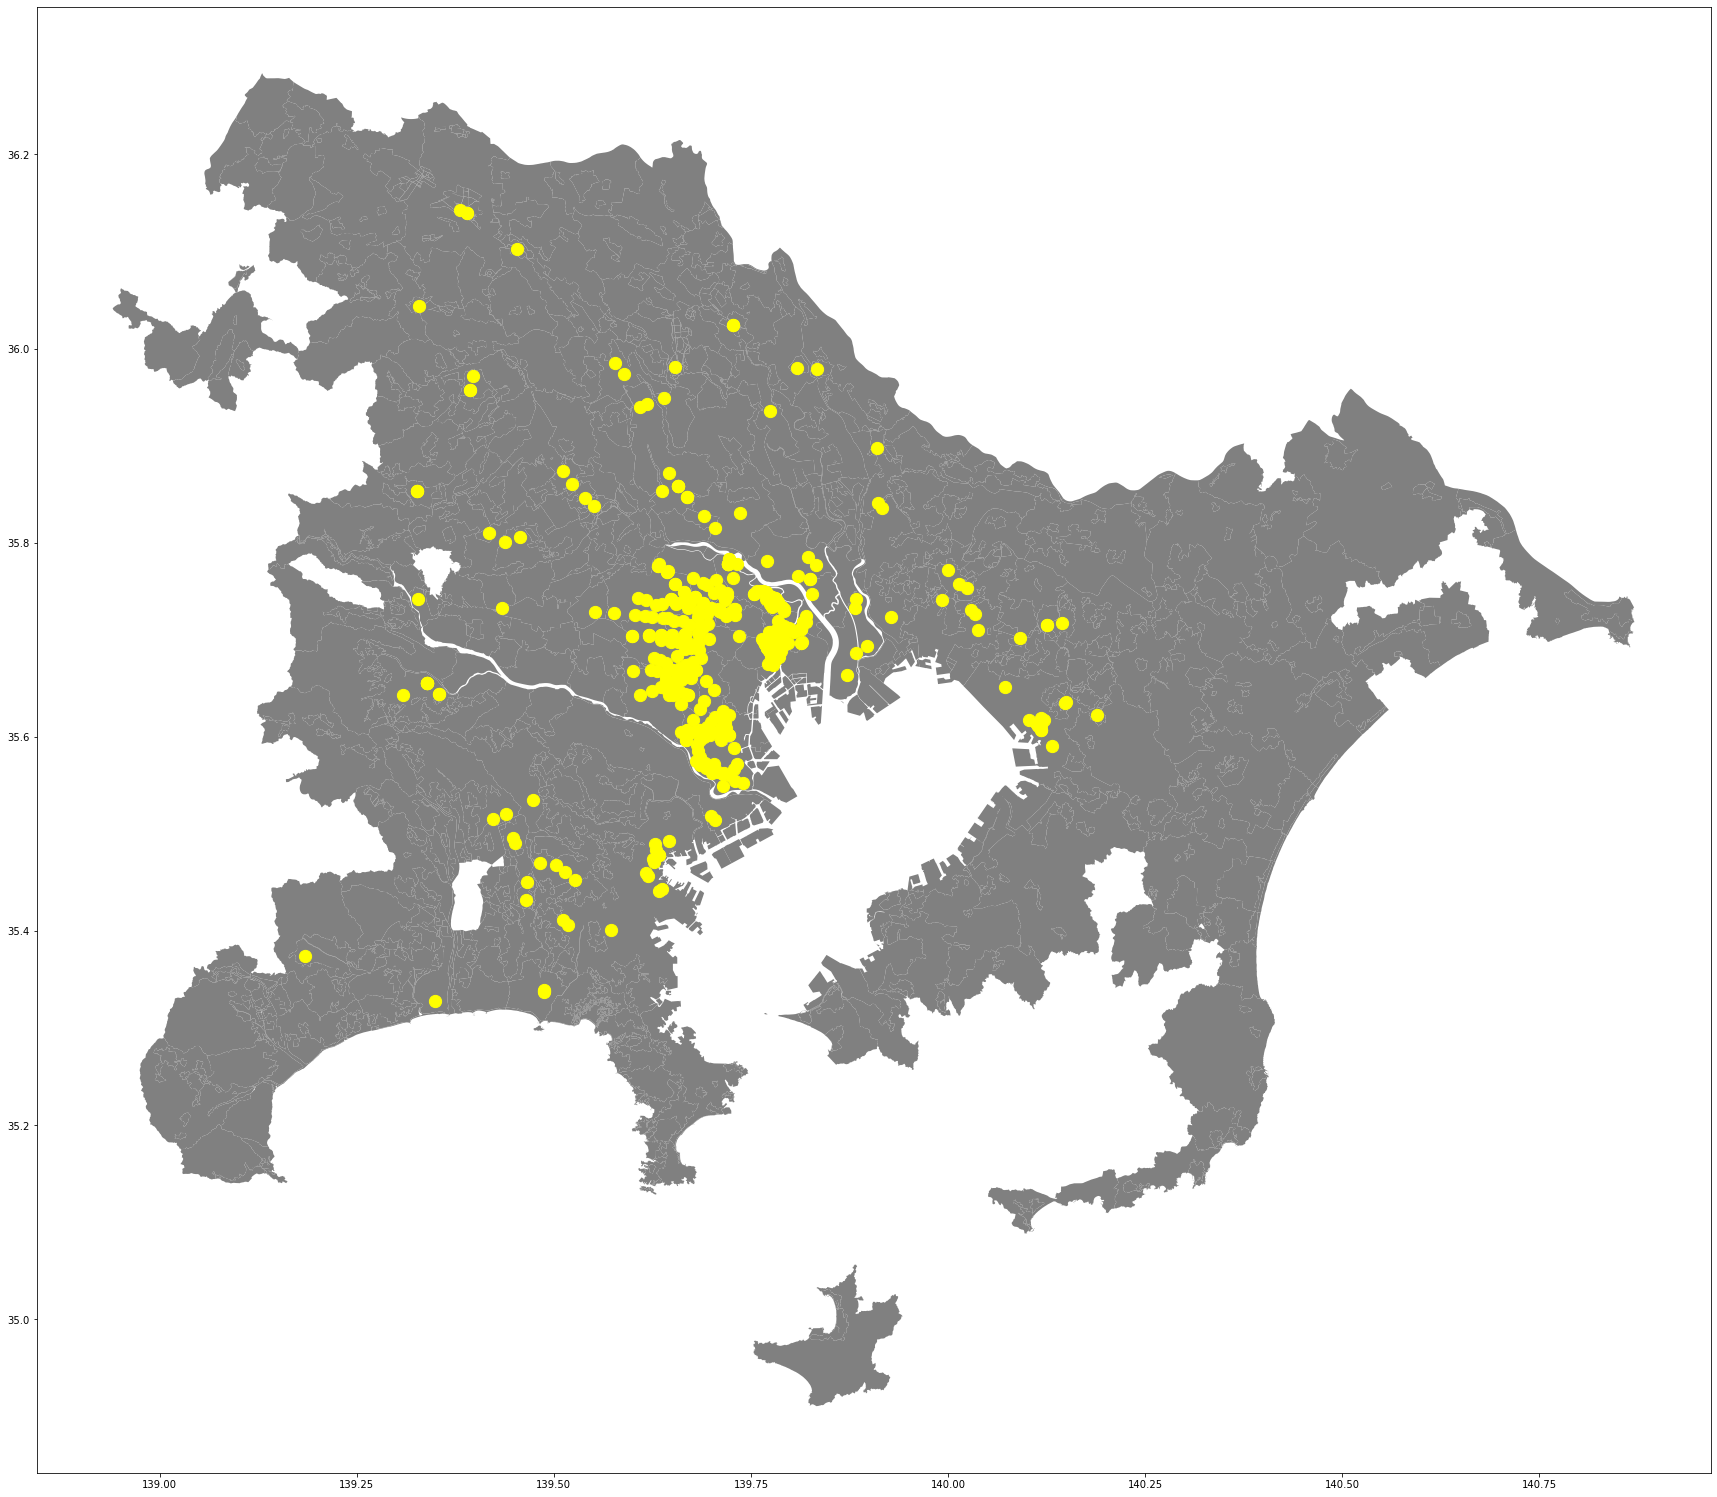

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
upa[(upa['prefec_cd'] != 13) | (upa['area_cd'] < 13300)].plot(ax = ax, color='gray')
stations_gdf[stations_gdf['cluster_number'] == 2].plot(ax = ax, color='yellow', markersize=150)


<AxesSubplot:>

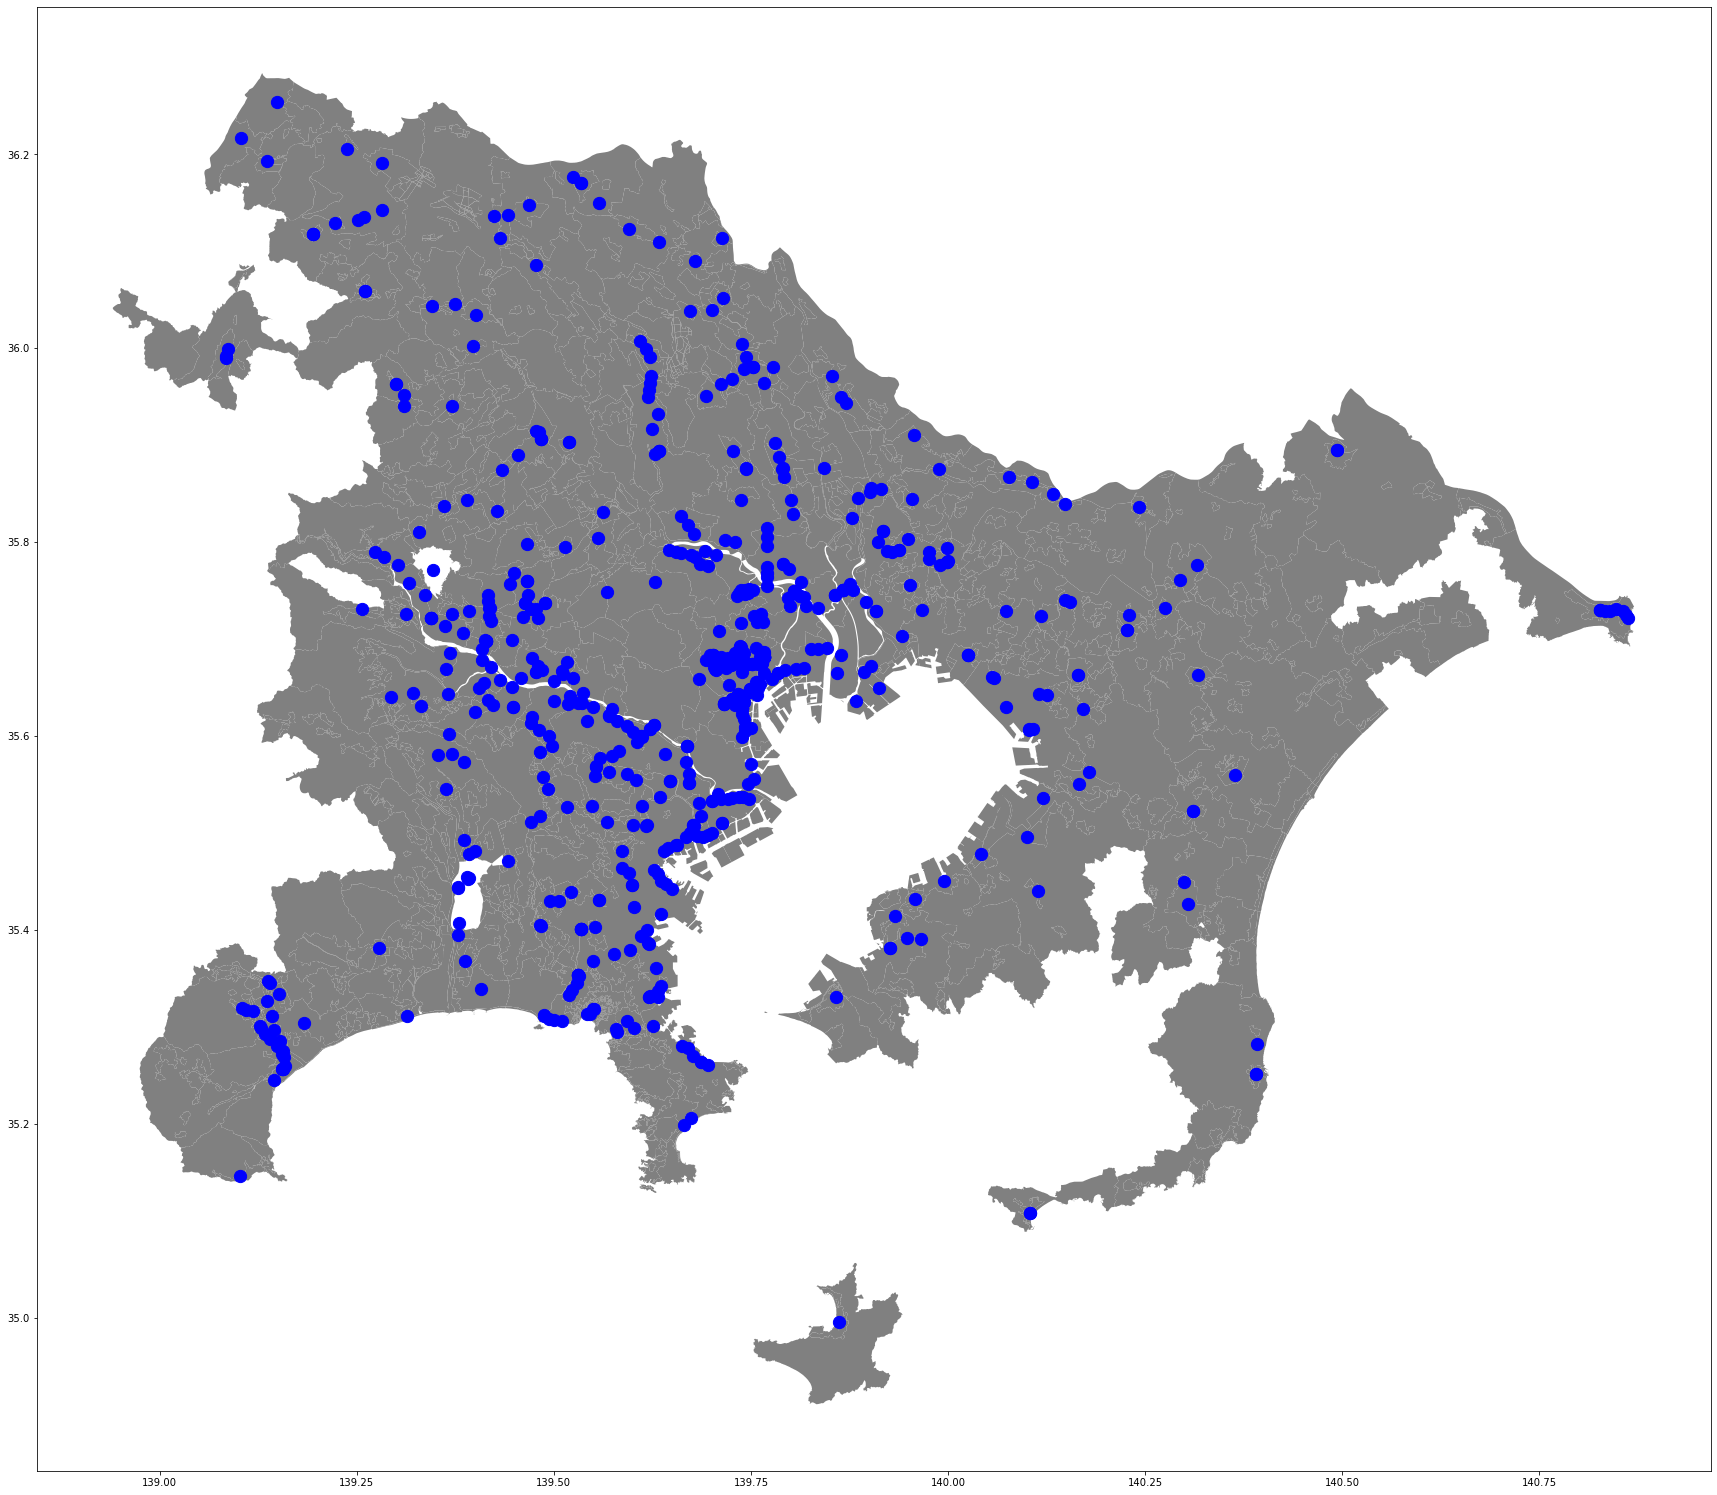

In [36]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
upa[(upa['prefec_cd'] != 13) | (upa['area_cd'] < 13300)].plot(ax = ax, color='gray')
stations_gdf[stations_gdf['cluster_number'] == 3].plot(ax = ax, color='blue', markersize=150)


<AxesSubplot:>

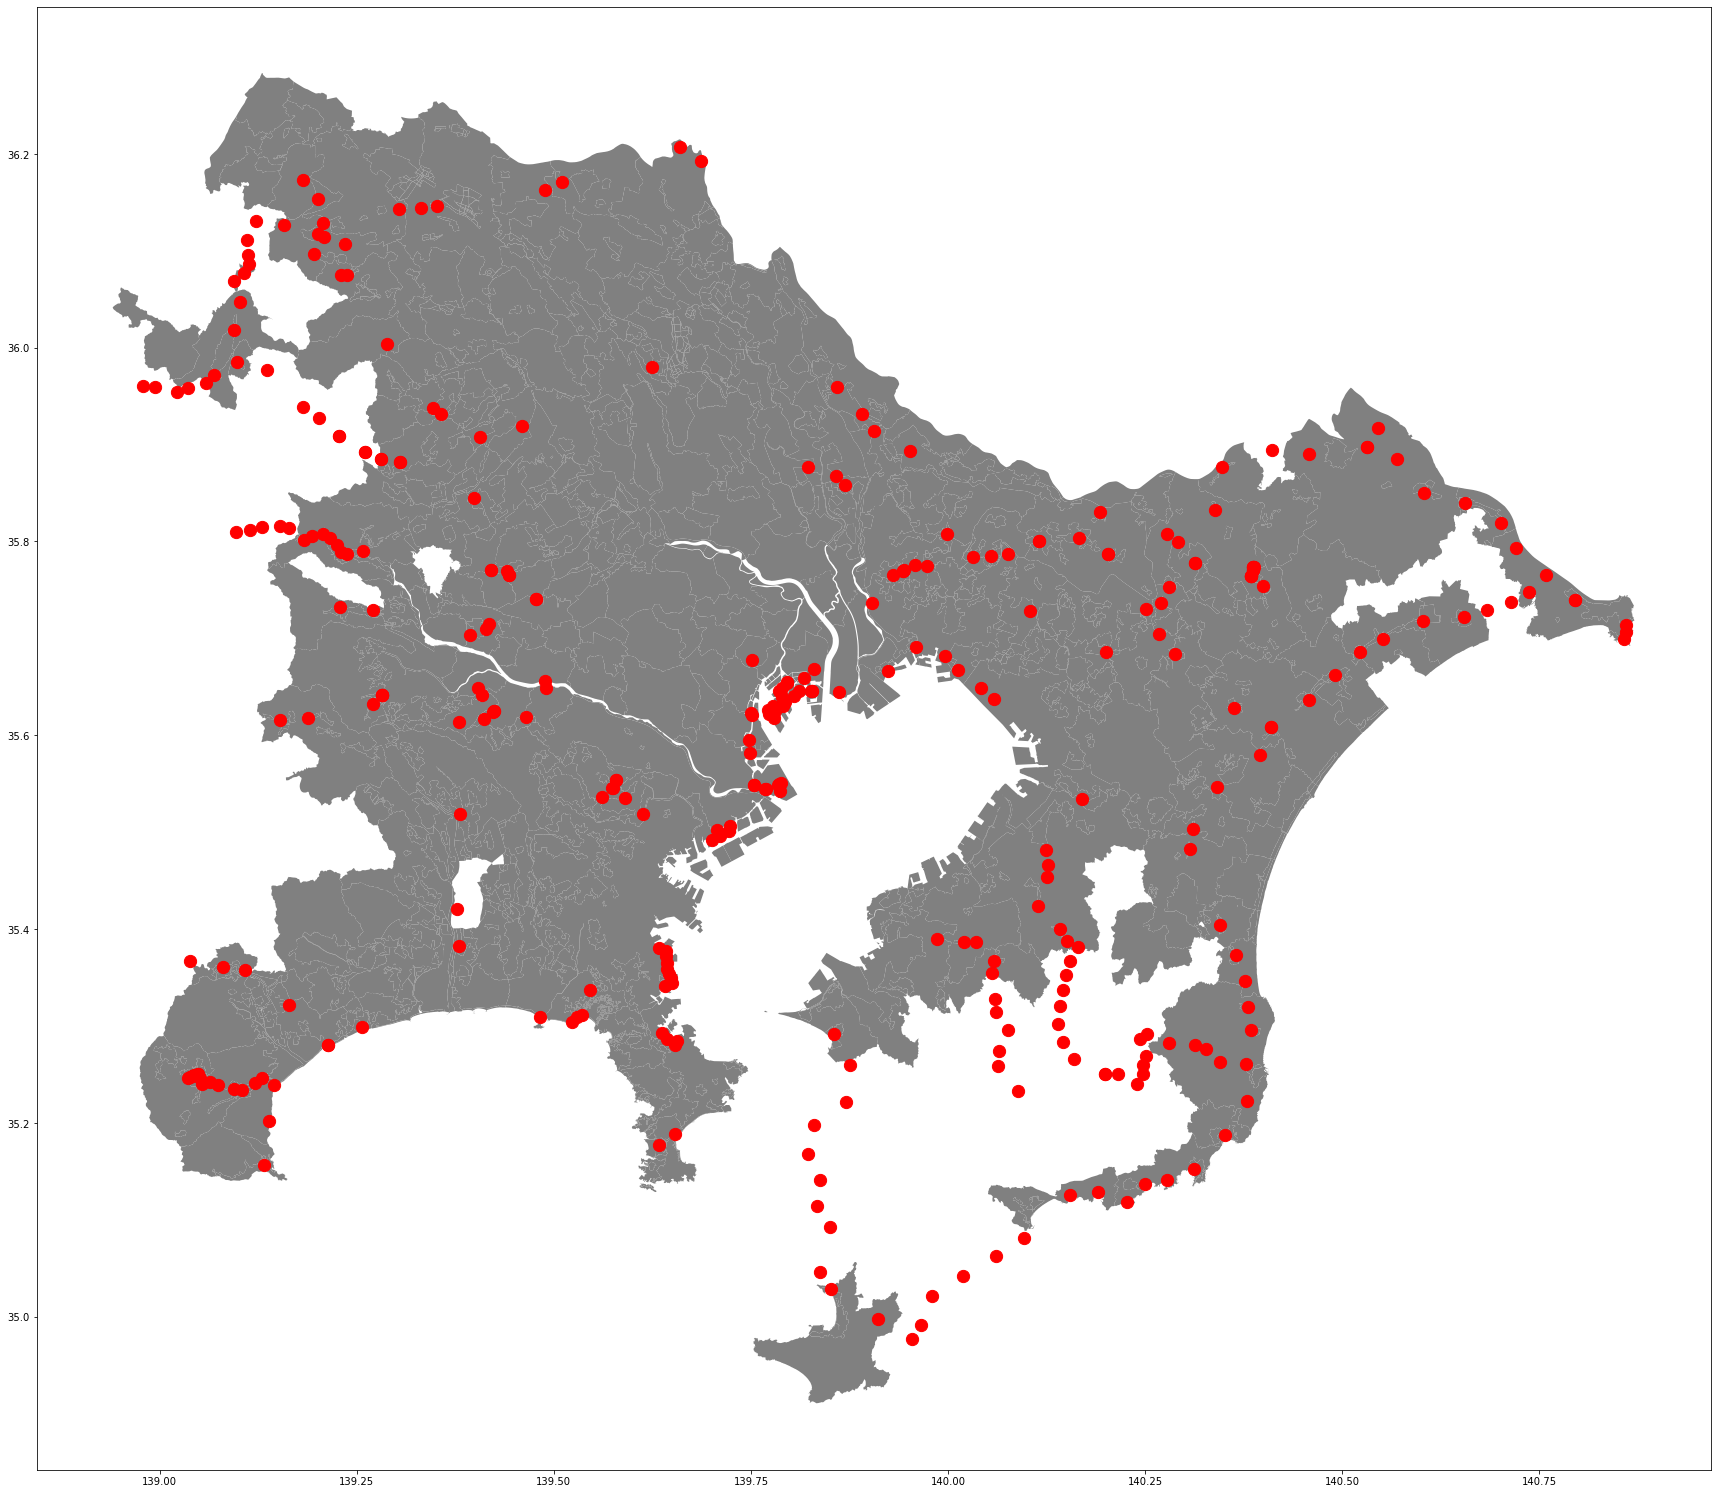

In [37]:
fig, ax = plt.subplots(1, 1, figsize=(30, 30))
upa[(upa['prefec_cd'] != 13) | (upa['area_cd'] < 13300)].plot(ax = ax, color='gray')
stations_gdf[stations_gdf['cluster_number'] == 4].plot(ax = ax, color='red', markersize=150)


In [14]:
stations_gdf[stations_gdf['cluster_number'] == 1].head()

station_cd  station_g_cd station_name  station_name_k  station_name_r  \
2      1130508       1130508          北朝霞             NaN             NaN   
3      1130509       1130509          西浦和             NaN             NaN   
4      1130510       1130510         武蔵浦和             NaN             NaN   
6      1130512       1130512          東浦和             NaN             NaN   
16     1131709       1131709          高麗川             NaN             NaN   

    line_cd  pref_cd      post           address         lon  ...  \
2     11305       11  351-0033          朝霞市浜崎１丁目  139.587322  ...   
3     11305       11  338-0837      さいたま市桜区田島５丁目  139.627707  ...   
4     11305       11  336-0021  さいたま市南区別所七丁目12-1  139.647974  ...   
6     11305       11  336-0922         さいたま市緑区大牧  139.704627  ...   
16    11317       11  350-1205             日高市原宿  139.338090  ...   

    intersection_density_km edge_density_km street_density_km  circuity_avg  \
2                220.936925    43252.257861      22209.618128      1.058486   
3                220.477262    41545.071412      21726.569992      1.042005   
4                246.320245    45257.298857      23983.223340      1.010927   
6                241.132398    47999.863277      24374.961347      1.047661   
16               245.812839    43630.151153      22043.075041      1.057730   

    self_loop_proportion  clean_intersection_count  \
2               0.001174                     335.0   
3               0.000000                     301.0   
4               0.000000                     418.0   
6               0.001238                     372.0   
16              0.001035                     358.0   

    clean_intersection_density_km  station_name_roman  cluster_number  \
2                      134.570673                 NaN               1   
3                      125.451145                 NaN               1   
4                      166.874979                 NaN               1   
6                      171.841479                 NaN               1   
16                     147.900834                 NaN               1   

                      geometry  
2   POINT (139.58732 35.81547)  
3   POINT (139.62771 35.84414)  
4   POINT (139.64797 35.84605)  
6   POINT (139.70463 35.86408)  
16  POINT (139.33809 35.89633)  

[5 rows x 38 columns]

In [12]:
def get_upa(x):
    target_upa = upa[upa.contains(x.geometry)]
    if (len(target_upa) > 0):
        return int(target_upa.iloc[0].layer_no)
    else:
        return None

In [13]:
stations_gdf['upa'] = stations_gdf.apply(get_upa, axis=1)

In [14]:
stations_gdf['upa'].value_counts()

1.0    1779
3.0      74
2.0      66
4.0      39
Name: upa, dtype: int64

In [15]:
def get_land_use(x):
    target_area = land_use[land_use.contains(x.geometry)]
    if (len(target_area) > 0):
        return int(target_area.iloc[0].A29_004)
    else:
        return None

In [16]:
land_use.head()

A29_001 A29_002 A29_003  A29_004       A29_005  A29_006  A29_007 A29_008  \
0   12208     千葉県     野田市        6       第二種住居地域       60      200     野田市   
1   12208     千葉県     野田市        1   第一種低層住居専用地域       50      100     野田市   
2   12208     千葉県     野田市        3  第一種中高層住居専用地域       60      200     野田市   
3   12208     千葉県     野田市        3  第一種中高層住居専用地域       60      200     野田市   
4   12208     千葉県     野田市        6       第二種住居地域       60      200     野田市   

   A29_009 A29_010                                           geometry  
0     2010    None  POLYGON ((139.88982 35.91527, 139.88966 35.915...  
1     2010    None  POLYGON ((139.88839 35.91803, 139.88679 35.917...  
2     2010    None  POLYGON ((139.91568 35.91987, 139.91539 35.919...  
3     2010    None  POLYGON ((139.88792 35.92221, 139.88829 35.921...  
4     2010    None  POLYGON ((139.88524 35.92283, 139.88366 35.921...

In [21]:
stations_gdf['land_use'] = stations_gdf.apply(get_land_use, axis=1)

In [22]:
stations_gdf['land_use'].value_counts()

9.0     891
8.0     382
5.0     256
10.0    126
1.0      50
3.0      50
6.0      38
11.0     20
12.0     13
4.0      12
7.0      12
2.0       5
Name: land_use, dtype: int64

In [23]:
def to_group_number(x):
    number = x['cluster_number']
    if number == 2:
        return 1
    elif number == 1:
        return 2
    elif number == 3:
        return 3
    else:
        return 4
    


In [24]:
stations_gdf['cluster_number'].value_counts()

3    652
1    617
2    419
4    343
Name: cluster_number, dtype: int64

In [25]:
stations_gdf

station_cd  station_g_cd station_name  station_name_k  station_name_r  \
0        1130506       1130506          東所沢             NaN             NaN   
1        1130507       1130507           新座             NaN             NaN   
2        1130508       1130508          北朝霞             NaN             NaN   
3        1130509       1130509          西浦和             NaN             NaN   
4        1130510       1130510         武蔵浦和             NaN             NaN   
...          ...           ...          ...             ...             ...   
2026     9934402       9934402          公園下             NaN             NaN   
2027     9934403       9934403          公園上             NaN             NaN   
2028     9934404       9934404          中強羅             NaN             NaN   
2029     9934405       9934405          上強羅             NaN             NaN   
2030     9934406       9934406          早雲山             NaN             NaN   

      line_cd  pref_cd      post           address         lon  ...  \
0       11305       11  359-0022          所沢市本郷１丁目  139.513878  ...   
1       11305       11  352-0011         新座市野火止５丁目  139.556328  ...   
2       11305       11  351-0033          朝霞市浜崎１丁目  139.587322  ...   
3       11305       11  338-0837      さいたま市桜区田島５丁目  139.627707  ...   
4       11305       11  336-0021  さいたま市南区別所七丁目12-1  139.647974  ...   
...       ...      ...       ...               ...         ...  ...   
2026    99344       14  250-0500       神奈川県足柄下郡箱根町  139.045639  ...   
2027    99344       14  250-0500       神奈川県足柄下郡箱根町  139.043167  ...   
2028    99344       14  250-0500       神奈川県足柄下郡箱根町  139.040556  ...   
2029    99344       14  250-0500       神奈川県足柄下郡箱根町  139.038056  ...   
2030    99344       14  250-0408     神奈川県足柄下郡箱根町強羅  139.035611  ...   

      street_density_km circuity_avg self_loop_proportion  \
0          22317.256266     1.033771             0.002147   
1          18873.557190     1.096247             0.003834   
2          22209.618128     1.058486             0.001174   
3          21726.569992     1.042005             0.000000   
4          23983.223340     1.010927             0.000000   
...                 ...          ...                  ...   
2026       12059.114397     1.122440             0.000000   
2027       11932.300758     1.170265             0.000000   
2028       10750.215902     1.169691             0.000000   
2029       10836.573154     1.182520             0.007463   
2030       10745.310000     1.249215             0.008333   

      clean_intersection_count  clean_intersection_density_km  \
0                        366.0                     165.080220   
1                        277.0                     115.765803   
2                        335.0                     134.570673   
3                        301.0                     125.451145   
4                        418.0                     166.874979   
...                        ...                            ...   
2026                     108.0                      57.337042   
2027                      93.0                      50.391056   
2028                      82.0                      46.491331   
2029                      79.0                      47.103452   
2030                      71.0                      43.921502   

      station_name_roman  cluster_number                    geometry  upa  \
0                    NaN               3  POINT (139.51388 35.79461)  1.0   
1                    NaN               3  POINT (139.55633 35.80381)  1.0   
2                    NaN               1  POINT (139.58732 35.81547)  1.0   
3                    NaN               1  POINT (139.62771 35.84414)  1.0   
4                    NaN               1  POINT (139.64797 35.84605)  1.0   
...                  ...             ...                         ...  ...   
2026          kouenshita               4  POINT (139.04564 35.24994)  3.0   
2027             kouenue               4  POINT (139.04317 35.24908)  3.0 

In [26]:
stations_gdf['group_number'] = stations_gdf.apply(to_group_number, axis=1)

In [27]:
stations_gdf.to_csv('stations_with_cluster_and_land_use.csv', index=False)

In [28]:
stations_1 = stations[stations['cluster_number'] == 2] # group1 
stations_2 = stations[stations['cluster_number'] == 1] # group2
stations_3 = stations[stations['cluster_number'] == 3] # group3
stations_4 = stations[stations['cluster_number'] == 4] # group4



In [99]:
def hist_feature(feature_name):
    target_names = stations['cluster_number'].unique()
    plt.figure(figsize=(8.0, 5.0))


    for target in target_names:
        target_stations = stations_gdf[stations_gdf['cluster_number'] == target]
        plt.hist(target_stations[feature_name], bins=4, alpha=0.6, label=target, color=colors[target])

    plt.title(feature_name)
    plt.legend()
    plt.savefig(f"{feature_name}_hist.png", bbox_inches = "tight")

labels = {2: 'first dense area', 1: 'second dense area', 3: 'third dense area', 4: 'forth dense area'}
colors = {2: 'green', 1: 'red', 3: 'pink', 4: 'blue'}

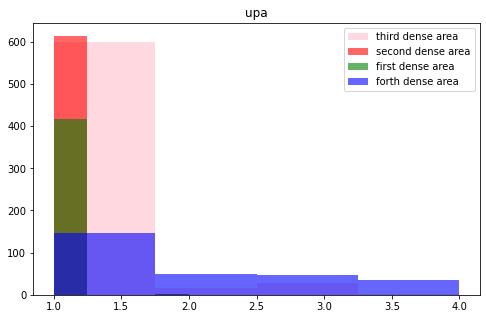

In [87]:
hist_feature('upa')

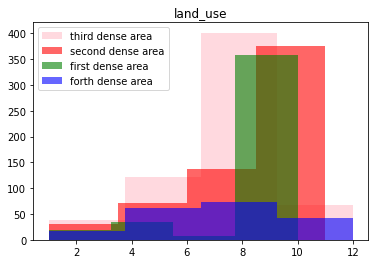

In [31]:
hist_feature('land_use')

<AxesSubplot:>

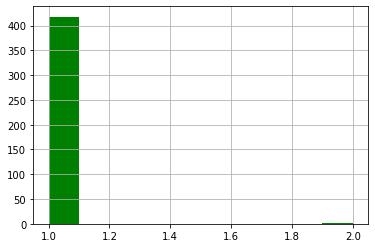

In [32]:
stations_1['upa'].hist(color='green')

<AxesSubplot:>

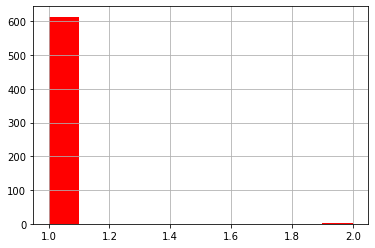

In [33]:
stations_2['upa'].hist(color='red')

<AxesSubplot:>

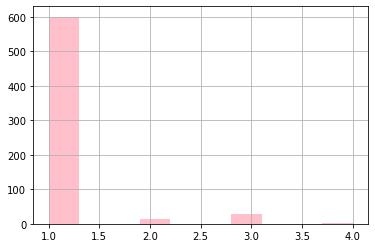

In [34]:
stations_3['upa'].hist(color='pink')

<AxesSubplot:>

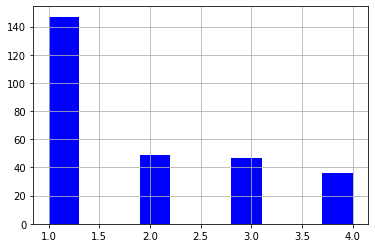

In [35]:
stations_4['upa'].hist(color='blue')

In [36]:
agg = stations_gdf.groupby(['group_number', 'land_use'])

In [37]:
count = agg.count()['station_cd']
count.columns = ['count']

In [89]:
# 用途地域を別の値に集約する
# 参考） https://www.delftstack.com/ja/howto/python-pandas/how-to-create-dataframe-column-based-on-given-condition-in-pandas/

conditionlist = [
    (stations_gdf['land_use'] <= 4) ,
    (stations_gdf['land_use'] >= 5) & (stations_gdf['land_use'] <=7),
    (stations_gdf['land_use'] >= 8) & (stations_gdf['land_use'] <=9),
    (stations_gdf['land_use'] >= 10) & (stations_gdf['land_use'] <=12),
    (stations_gdf['land_use'] == 21),
    (stations_gdf['land_use'] == 99)
]
choicelist = ['exclusive residential area',
    'residential area',
    'commercial area',
    'industrial area',
    'rural area',
    'others'
]
stations_gdf['use_district'] = np.select(conditionlist, choicelist, default='Not Specified')

print(stations_gdf)

      station_cd  station_g_cd station_name  station_name_k  station_name_r  \
0        1130506       1130506          東所沢             NaN             NaN   
1        1130507       1130507           新座             NaN             NaN   
2        1130508       1130508          北朝霞             NaN             NaN   
3        1130509       1130509          西浦和             NaN             NaN   
4        1130510       1130510         武蔵浦和             NaN             NaN   
...          ...           ...          ...             ...             ...   
2026     9934402       9934402          公園下             NaN             NaN   
2027     9934403       9934403          公園上             NaN             NaN   
2028     9934404       9934404          中強羅             NaN             NaN   
2029     9934405       9934405          上強羅             NaN             NaN   
2030     9934406       9934406          早雲山             NaN             NaN   

      line_cd  pref_cd      post           address 

In [90]:
stations_gdf[['land_use', 'use_district']].head()

land_use      use_district
0       8.0   commercial area
1       5.0  residential area
2       9.0   commercial area
3       5.0  residential area
4       9.0   commercial area

In [91]:
stations_gdf['use_district'].value_counts()

commercial area               1273
residential area               306
Not Specified                  176
industrial area                159
exclusive residential area     117
Name: use_district, dtype: int64

In [92]:
table = pd.pivot_table(stations_gdf, index='group_number', columns='use_district', aggfunc=len)

In [93]:
table['address']

use_district  Not Specified  commercial area  exclusive residential area  \
group_number                                                               
1                         1              343                          21   
2                         2              459                          33   
3                        24              397                          43   
4                       149               74                          20   

use_district  industrial area  residential area  
group_number                                     
1                          14                40  
2                          35                88  
3                          68               120  
4                          42                58

In [94]:
stations_gdf.head()

station_cd  station_g_cd station_name  station_name_k  station_name_r  \
0     1130506       1130506          東所沢             NaN             NaN   
1     1130507       1130507           新座             NaN             NaN   
2     1130508       1130508          北朝霞             NaN             NaN   
3     1130509       1130509          西浦和             NaN             NaN   
4     1130510       1130510         武蔵浦和             NaN             NaN   

   line_cd  pref_cd      post           address         lon  ...  \
0    11305       11  359-0022          所沢市本郷１丁目  139.513878  ...   
1    11305       11  352-0011         新座市野火止５丁目  139.556328  ...   
2    11305       11  351-0033          朝霞市浜崎１丁目  139.587322  ...   
3    11305       11  338-0837      さいたま市桜区田島５丁目  139.627707  ...   
4    11305       11  336-0021  さいたま市南区別所七丁目12-1  139.647974  ...   

   clean_intersection_density_km station_name_roman cluster_number  \
0                     165.080220                NaN              3   
1                     115.765803                NaN              3   
2                     134.570673                NaN              1   
3                     125.451145                NaN              1   
4                     166.874979                NaN              1   

                     geometry  upa  land_use  group_number  \
0  POINT (139.51388 35.79461)  1.0       8.0             3   
1  POINT (139.55633 35.80381)  1.0       5.0             3   
2  POINT (139.58732 35.81547)  1.0       9.0             2   
3  POINT (139.62771 35.84414)  1.0       5.0             2   
4  POINT (139.64797 35.84605)  1.0       9.0             2   

   consolidated_land_use       land_of_use      use_district  
0        commercial area   commercial area   commercial area  
1       residential area  residential area  residential area  
2        commercial area   commercial area   commercial area  
3       residential area  residential area  residential area  
4        commercial area   commercial area   commercial area  

[5 rows x 44 columns]

In [95]:
table.head()

address                                             \
use_district Not Specified commercial area exclusive residential area   
group_number                                                            
1                        1             343                         21   
2                        2             459                         33   
3                       24             397                         43   
4                      149              74                         20   

                                               circuity_avg                  \
use_district industrial area residential area Not Specified commercial area   
group_number                                                                  
1                         14               40             1             343   
2                         35               88             2             459   
3                         68              120            24             397   
4                         42               58           149              74   

                                                                          ...  \
use_district exclusive residential area industrial area residential area  ...   
group_number                                                              ...   
1                                    21              14               40  ...   
2                                    33              35               88  ...   
3                                    43              68              120  ...   
4                                    20              42               58  ...   

             streets_per_node_proportion                  \
use_district               Not Specified commercial area   
group_number                                               
1                                      1             343   
2                                      2             459   
3                                     24             397   
4                                    149              74   

                                                                          \
use_district exclusive residential area industrial area residential area   
group_number                                                               
1                                    21              14               40   
2                                    33              35               88   
3                                    43              68              120   
4                                    20              42               58   

                       upa                                             \
use_district Not Specified commercial area exclusive residential area   
group_number                                                            
1                        1             343                         21   
2                        2             459                         33   
3                       24             397                         43   
4                      149              74                         20   

                                               
use_district industrial area residential area  
group_number                                   
1                         14               40  
2                         35               88  
3                         68              120  
4                         42               58  

[4 rows x 210 columns]

<AxesSubplot:xlabel='use_district', ylabel='group_number'>

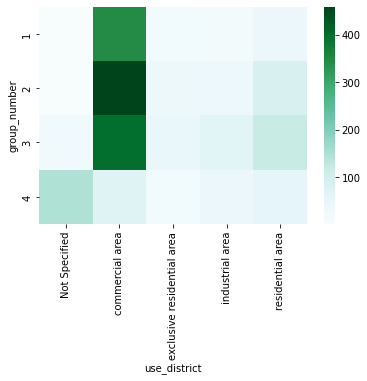

In [96]:
sns.heatmap(table['address'], cmap='BuGn')
#plt.savefig('./land_use_by_cluster_heatmap.png')

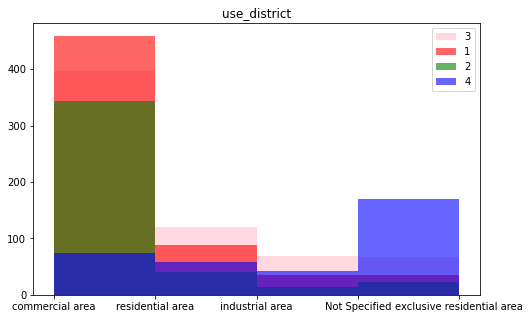

In [100]:
hist_feature('use_district')

<AxesSubplot:>

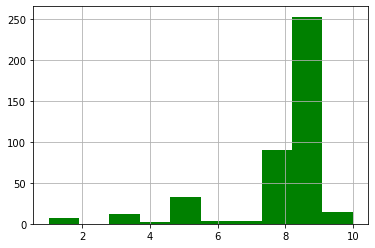

In [44]:
stations_gdf[stations_gdf['group_number'] == 1]['land_use'].hist(color='green')

<AxesSubplot:>

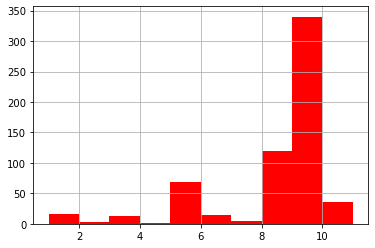

In [45]:
stations_gdf[stations_gdf['group_number'] == 2]['land_use'].hist(color='red')

<AxesSubplot:>

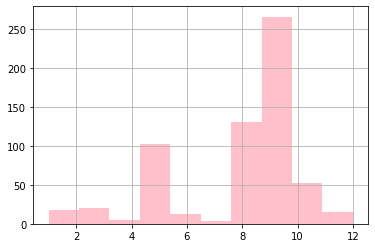

In [46]:
stations_gdf[stations_gdf['group_number'] == 3]['land_use'].hist(color='pink')

<AxesSubplot:>

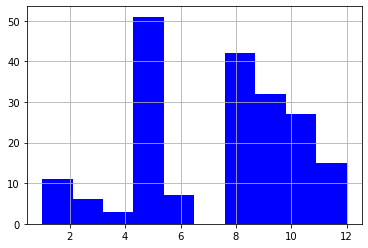

In [47]:
stations_gdf[stations_gdf['group_number'] == 4]['land_use'].hist(color='blue')